# Method Definitions

In [76]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *
MaxIterations = 1000

In [77]:
def BisectionMethod(f,A, B, TOL, N = MaxIterations):
    
    a = copy.copy(A)
    b = copy.copy(B)

    print("\n\n***** BISECTION METHOD *****")
    i = 1
    
    data =[]
    accuracy = []

    while i<=N:
        
        # Finding Bisection
        m = (a+b)/2
        
        # Finding Function Value at a b and m
        fa = f(a)
        fm = f(m)
        fb = f(b)
        
        print(f'iteration = {i:3}  a = {a:.15f}  b = {b:.15f}  m = {m:.15f}  f(m) = {fm:.15f}')
        
        data.append([i,a,b,m,f(m)])
        
        if abs(fm) <=TOL or (abs(m-a)) < TOL:
            print(f'\nFinal Root Found')
            
            print(f'\nRequired root is: {m:3.15f}\n\n')
            break


        acc =[]
        acc.append(i)
        i = i + 1

        accuracyReached = 0
        
        # Checking Interval for next iteration
        if fa*fm>0:
            accuracyReached = abs(a-m)
            a = m
        else:
            accuracyReached = abs(b-m)
            b = m
        
        acc.append(accuracyReached)
        accuracy.append(acc)

    table = ptbl(['Iteration','a','b','m','f(m)'])
    for t in data:
        table.add_row(t)

    if i > N:
        print("Not Convergent")        
    return accuracy,table  

In [78]:
def FalsePosition(f, a ,b ,e ,N=MaxIterations):
    table = ptbl(['Iteration','x0','x1','x2','f(x2)'])

    x0 = copy.copy(a)
    x1 = copy.copy(b)

    print('\n\n*** FALSE POSITION METHOD IMPLEMENTATION ***')
    if f(x0) * f(x1) > 0.0:
        print('Given guess values do not bracket the root.')
        print('Try Again with different guess values.')
        return 0,table
    else:
        data = []
        accuracy = []
        
        step = 1
        
        while step <= N :
            
            # x2 = (x0*f(x1) - x1*f(x0))/( f(x1) - f(x0) )      # Both formula's are same 
            x2 = x1 - (f(x1)*(x1-x0))/(f(x1) - f(x0))
            

            print(f'Iteration-{step:3}, x0 = {x0:.15f}  x1 = {x1:.15f}  x2 = {x2:.15f} and f(x2) = {f(x2):.15f}')
            data.append([step,x0,x1,x2,f(x2)])

            if(abs(x2-x1)<e or abs(f(x2)) <e):
                print(f'\nRequired root is: {x2:3.15f}')
                break
            
            accuracyReached = 0

            if f(x0) * f(x2) < 0:
                accuracyReached = abs(x1-x2)
                x1 = x2
            else:
                accuracyReached = abs(x0-x2)
                x0 = x2
            
            accuracy.append([step,accuracyReached])

            step = step + 1

        for dt in data:
            table.add_row(dt)

        if step > N:
            print('Not Convergent!')

        return accuracy,table

In [79]:
def SecantMethod(f, a, b, e, N=MaxIterations):
    
    x0 = copy.copy(a)
    x1 = copy.copy(b)
    
    print('\n\n*** SECANT METHOD IMPLEMENTATION ***')
    
    data =[]
    accuracy = []
    
    step = 1

    while step <= N:
        if f(x0) == f(x1):
            print('Divide by zero error!') 
            break
        
        x2 = x1 - (x1-x0)*f(x1)/( f(x1) - f(x0) ) 
        
        accuracyReached = abs(x2-x1)

        accuracy.append([step,accuracyReached])

        print(f'Iteration-{step:3}, a = {x0:.15f}   b ={x1:.15f}  c = {x2:.15f}  f(x2) = {f(x2):.15f}')
        
        data.append([step,x0,x1,x2,f(x2)])

        if(accuracyReached<e):
            print(f'\nRequired root is: {x1:3.15f}')
            break
        
        x0 = x1
        x1 = x2
        step = step + 1
    
    table = ptbl(['Iteration','x0','x1','x2','f(x2)'])
    for dt in data:
        table.add_row(dt)

    if(step > N):
        print('\nNot Convergent.')   
    return accuracy,table

In [80]:
def NewtonRaphson(f, f1, a, e, N=MaxIterations):

    x0 = copy.copy(a)
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    data = []
    accuracy = []

    step = 1

    while step <= N:
        if f1(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/f1(x0)
        
        print(f'Iteration = {step:3}, x0 = {x0:.15f} x1 = {x1:.15f}   f(x1) = {f(x1):.15f} ')
        
        data.append([step,x0,x1,f(x1)])
        
        accuracyReached = abs(x1-x0)
        accuracy.append([step,accuracyReached])

        if(accuracyReached <e or abs(f(x1))<e):
            print(f'\nRequired root is: {x1:3.15f}')
            break
        x0 = x1
        step = step + 1
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)    

    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy,table

In [81]:
def fixedPointIteration(f, g, a, e, N = MaxIterations):
    
    x0 = copy.copy(a)
    print('\n\n*** FIXED POINT ITERATION METHOD ***')
    
    accuracy = []
    data = []
    step = 1
    
    while step <= N:
        
        x1 = g(x0)

        accuracyReached = abs(x1-x0)
        
        accuracy.append([step,accuracyReached])
        
        print(f'Iteration = {step:3}, x0 = {x0:.15f}  x1 = {x1:.15f}   f(x1) = {f(x1):.15f} ')
        
        data.append([step,x0,x1,f(x1)])
        
        if accuracyReached < e or abs(f(x1)) < e:
            print(f'\nRequired root is: {x1:3.15}')
            break

        step = step + 1
        x0=x1
    
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)

    if(step > N):
        print('\nNot Convergent.')
    return accuracy,table

In [82]:
def h(f, f1,x):
    return f(x)/f1(x)
def g(f, f1, f2, x):
    return (((f1(x))**2)-(f(x))*f2(x))/((f1(x))**2)

def modifiedNewtonRaphson(f,f1,f2, a,e,N=MaxIterations):

    x0 = copy.copy(a)

    print('\n\n*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    data =[]
    accuracy = []
    
    step = 1

    while step <= N:
        if g(f, f1, f2, x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - h(f, f1,x0)/g(f, f1, f2, x0)
        
        accuracyReached = abs(x1-x0)
        
        accuracy.append([step,accuracyReached])
        
        print(f'Iteration = {step:3}, x0 = {x0:.15f}   x1 = {x1:.15f}   f(x1) = {f(x1):.15f} ')
        
        data.append([step,x0,x1,f(x1)])

        if(accuracyReached < e or abs(f(x1)) < e):
            print(f'\nRequired root is: {x1:3.15f}')
            break
        x0 = x1
        step = step + 1
    
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)

    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy,table

In [83]:
def Muller(f, p, q, r, TOL, N = MaxIterations): 

    x0 = copy.copy(p)
    x1 = copy.copy(q)
    x2 = copy.copy(r)
    
    print("\n\n*** MULLER METHOD IMPLEMENTATION ***")
    
    data = []
    accuracy = []
    
    h1 = x1 - x0  
    h2 = x2 - x1 
    
    f0 = f(x0) 
    f1 = f(x1) 
    f2 = f(x2) 
    
    d1 = (f1 - f0)/h1  
    d2 = (f2 - f1)/h2 
    d = (d2-d1)/(h1+h2) 
    i = 3
    
    while i<=N: 
        
        b = d2 +h2*d
        D = ((b**2)-4*f2*d)**(1/2)
            
        if(abs(b-D) < abs(b+D)):
            E = b + D 
        else:
            E = b - D

        h = -2*f2/E
        p = x2 + h
        
       
        
        print(f'Iteration = {i:3}  a = {d:.15f} b = {b:.15f}  c = {f(x2):.15f}  p = {p:.15f}  f(p) = {f(p):.15f}')
        
        data.append([i,d,b,f(x2),p,f(p)])

        if(abs(h)<TOL or abs(f(p)) < TOL):
            print(f"\nRequired Root: x = {p:3.15f}")
            break
        
        x0 = x1
        x1 = x2
        x2 = p

        acc =[]
        acc.append(i)
        acc.append(abs(x1-x2))
        accuracy.append(acc)

        h1 = x1 - x0  
        h2 = x2 - x1 

        f0 = f(x0) 
        f1 = f(x1) 
        f2 = f(x2) 
        
        d1 = (f1 - f0)/h1  
        d2 = (f2 - f1)/h2 
        d = (d2-d1)/(h1+h2) 
    
        i += 1 

    table = ptbl(['Iteration','a','b','c','p (root)','f(p)'])
    for dt in data:
        table.add_row(dt)

    if (i > MaxIterations): 
        print("Root cannot be found using, Muller's method") 
    return accuracy,table

# Input Section

## Defining Functions

In [84]:
# Defining Function
def f(x):
    q = 16*(x**4) - 40*(x**3) + 5*(x**2) + 20*x + 6
    return q

def G(x):
    return (6/((16*(x**3)) - (40*(x**2)) - (5*x) + 20))

# Defining derivative of function
def f1(x):
    return 16*4*(x**3) - 40*3*(x**2) + 5*2*x + 20

def f2(x):
    return 16*4*3*(x**2) - 40*3*2*x + 10

## Initial Guesses and Acuuracy

In [102]:
x0 = 0.5
x1 = 1.0
x2 = 1.5

e = 0.0001

# Calling Methods

## Bisection Method



***** BISECTION METHOD *****
iteration =   1  a = 0.500000000000000  b = 1.000000000000000  m = 0.750000000000000  f(m) = 12.000000000000000
iteration =   2  a = 0.750000000000000  b = 1.000000000000000  m = 0.875000000000000  f(m) = 9.910156250000000
iteration =   3  a = 0.875000000000000  b = 1.000000000000000  m = 0.937500000000000  f(m) = 8.545166015625000
iteration =   4  a = 0.937500000000000  b = 1.000000000000000  m = 0.968750000000000  f(m) = 7.793228149414062
iteration =   5  a = 0.968750000000000  b = 1.000000000000000  m = 0.984375000000000  f(m) = 7.401520729064941
iteration =   6  a = 0.984375000000000  b = 1.000000000000000  m = 0.992187500000000  f(m) = 7.201953947544098
iteration =   7  a = 0.992187500000000  b = 1.000000000000000  m = 0.996093750000000  f(m) = 7.101271156221628
iteration =   8  a = 0.996093750000000  b = 1.000000000000000  m = 0.998046875000000  f(m) = 7.050708592170849
iteration =   9  a = 0.998046875000000  b = 1.000000000000000  m = 0.99902343750

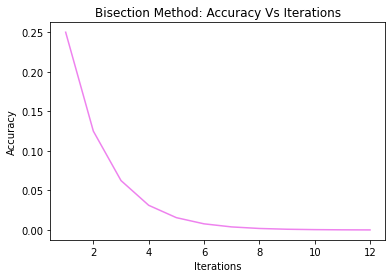

+-----------+-----------------+-----+------------------+--------------------+
| Iteration |        a        |  b  |        m         |        f(m)        |
+-----------+-----------------+-----+------------------+--------------------+
|     1     |       0.5       | 1.0 |       0.75       |        12.0        |
|     2     |       0.75      | 1.0 |      0.875       |     9.91015625     |
|     3     |      0.875      | 1.0 |      0.9375      |   8.545166015625   |
|     4     |      0.9375     | 1.0 |     0.96875      | 7.7932281494140625 |
|     5     |     0.96875     | 1.0 |     0.984375     | 7.401520729064941  |
|     6     |     0.984375    | 1.0 |    0.9921875     | 7.201953947544098  |
|     7     |    0.9921875    | 1.0 |    0.99609375    | 7.101271156221628  |
|     8     |    0.99609375   | 1.0 |   0.998046875    | 7.050708592170849  |
|     9     |   0.998046875   | 1.0 |   0.9990234375   | 7.025372482850798  |
|     10    |   0.9990234375  | 1.0 |  0.99951171875   | 7.01269

In [103]:
b_acc,Bisection_table = BisectionMethod(f,x0,x1,e)
b_i = []
b_a = []
for i in b_acc:
    b_i.append(i[0])
    b_a.append(i[1])
plt.title("Bisection Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(b_i,b_a,color = 'violet')
plt.show()

print(Bisection_table)

## False Position Method

In [104]:
f_acc,False_position_table = FalsePosition(f,x0,x1,e)
f_i = []
f_a = []
if f_acc!=0:
    for i in f_acc:
        f_i.append(i[0])
        f_a.append(i[1])
    plt.title("False Position Method: Accuracy Vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.plot(f_i,f_a,color = 'indigo')
    plt.show()
    print(False_position_table)




*** FALSE POSITION METHOD IMPLEMENTATION ***
Given guess values do not bracket the root.
Try Again with different guess values.


## Secant Method



*** SECANT METHOD IMPLEMENTATION ***
Iteration-  1, a = 0.500000000000000   b =1.000000000000000  c = 1.560000000000000  f(x2) = -7.730096639999978
Iteration-  2, a = 1.000000000000000   b =1.560000000000000  c = 1.266121811404491  f(x2) = -0.732186086637647
Iteration-  3, a = 1.560000000000000   b =1.266121811404491  c = 1.235373558877525  f(x2) = 0.189738466841174
Iteration-  4, a = 1.266121811404491   b =1.235373558877525  c = 1.241701762492991  f(x2) = -0.000731352105195
Iteration-  5, a = 1.235373558877525   b =1.241701762492991  c = 1.241677463918750  f(x2) = -0.000000576054589

Required root is: 1.241701762492991


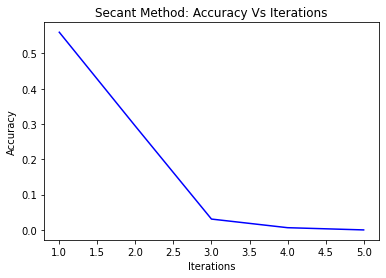

+-----------+--------------------+--------------------+--------------------+------------------------+
| Iteration |         x0         |         x1         |         x2         |         f(x2)          |
+-----------+--------------------+--------------------+--------------------+------------------------+
|     1     |        0.5         |        1.0         |        1.56        |   -7.730096639999978   |
|     2     |        1.0         |        1.56        | 1.266121811404491  |  -0.7321860866376468   |
|     3     |        1.56        | 1.266121811404491  | 1.2353735588775248 |   0.1897384668411739   |
|     4     | 1.266121811404491  | 1.2353735588775248 | 1.2417017624929911 | -0.0007313521051948157 |
|     5     | 1.2353735588775248 | 1.2417017624929911 | 1.2416774639187504 | -5.760545889188506e-07 |
+-----------+--------------------+--------------------+--------------------+------------------------+


In [105]:
s_acc,Secant_table = SecantMethod(f,x0,x1,e)
s_i = []
s_a = []
for i in s_acc:
    s_i.append(i[0])
    s_a.append(i[1])
plt.title("Secant Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(s_i,s_a,color = 'blue')
plt.show()

print(Secant_table)

## Newton Raphson Method



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.500000000000000 x1 = -3.916666666666667   f(x1) = 6172.864197530866477 
Iteration =   2, x0 = -3.916666666666667 x1 = -2.834713359256831   f(x1) = 1933.762453201398557 
Iteration =   3, x0 = -2.834713359256831 x1 = -2.039073987573261   f(x1) = 601.731797808343003 
Iteration =   4, x0 = -2.039073987573261 x1 = -1.461556565353886   f(x1) = 185.343652943861883 
Iteration =   5, x0 = -1.461556565353886 x1 = -1.050383253187402   f(x1) = 56.341092747367213 
Iteration =   6, x0 = -1.050383253187402 x1 = -0.764488845449164   f(x1) = 16.969632761995236 
Iteration =   7, x0 = -0.764488845449164 x1 = -0.568020324700803   f(x1) = 5.249251436322931 
Iteration =   8, x0 = -0.568020324700803 x1 = -0.422720936401299   f(x1) = 1.971435901211081 
Iteration =   9, x0 = -0.422720936401299 x1 = -0.235050094527777   f(x1) = 2.143526322358788 
Iteration =  10, x0 = -0.235050094527777 x1 = -0.445435734134251   f(x1) = 2.248443230032105 
It

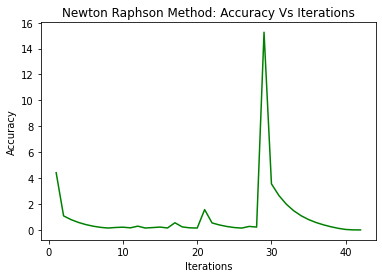

+-----------+----------------------+----------------------+------------------------+
| Iteration |          x0          |          x1          |         f(x1)          |
+-----------+----------------------+----------------------+------------------------+
|     1     |         0.5          |  -3.916666666666667  |   6172.8641975308665   |
|     2     |  -3.916666666666667  |  -2.834713359256831  |   1933.7624532013986   |
|     3     |  -2.834713359256831  | -2.0390739875732606  |    601.731797808343    |
|     4     | -2.0390739875732606  | -1.4615565653538862  |   185.34365294386188   |
|     5     | -1.4615565653538862  | -1.0503832531874018  |   56.34109274736721    |
|     6     | -1.0503832531874018  | -0.7644888454491637  |   16.969632761995236   |
|     7     | -0.7644888454491637  |  -0.568020324700803  |   5.249251436322931    |
|     8     |  -0.568020324700803  | -0.42272093640129926 |   1.9714359012110814   |
|     9     | -0.42272093640129926 | -0.2350500945277766  |   2.1

In [106]:
n_acc,NR_table = NewtonRaphson(f,f1,x0,e)
n_i = []
n_a = []
for i in n_acc:
    n_i.append(i[0])
    n_a.append(i[1])
plt.title("Newton Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(n_i,n_a,color = 'green')
plt.show()
print(NR_table)

## Fixed Point Iteration Method

0.465467346945247  x1 = 0.564980337864740   f(x1) = 13.312135497727297 
Iteration = 9793, x0 = 0.564980337864740  x1 = 0.822765396871363   f(x1) = 10.893441734775523 
Iteration = 9794, x0 = 0.822765396871363  x1 = -2.631463719272463   f(x1) = 1484.068868333404225 
Iteration = 9795, x0 = -2.631463719272463  x1 = -0.011207074229750   f(x1) = 5.776543064042974 
Iteration = 9796, x0 = -0.011207074229750  x1 = 0.299237111305606   f(x1) = 11.488961482003894 
Iteration = 9797, x0 = 0.299237111305606  x1 = 0.390858772563288   f(x1) = 12.565981097263807 
Iteration = 9798, x0 = 0.390858772563288  x1 = 0.465467346945247   f(x1) = 13.109786608606505 
Iteration = 9799, x0 = 0.465467346945247  x1 = 0.564980337864741   f(x1) = 13.312135497727295 
Iteration = 9800, x0 = 0.564980337864741  x1 = 0.822765396871364   f(x1) = 10.893441734775507 
Iteration = 9801, x0 = 0.822765396871364  x1 = -2.631463719272405   f(x1) = 1484.068868333289402 
Iteration = 9802, x0 = -2.631463719272405  x1 = -0.01120707422975

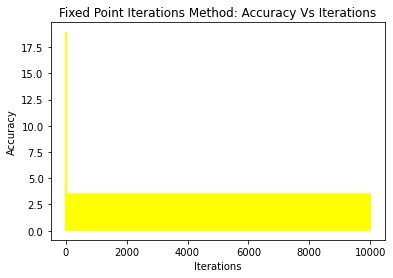

  9761   | -0.011207074229750844 |   0.299237111305606   | 11.488961482003894 |
|    9762   |   0.299237111305606   |  0.39085877256328816  | 12.565981097263805 |
|    9763   |  0.39085877256328816  |  0.46546734694524733  | 13.109786608606504 |
|    9764   |  0.46546734694524733  |   0.5649803378647404  | 13.312135497727297 |
|    9765   |   0.5649803378647404  |   0.8227653968713632  | 10.893441734775523 |
|    9766   |   0.8227653968713632  |  -2.6314637192724626  | 1484.0688683334042 |
|    9767   |  -2.6314637192724626  | -0.011207074229750197 | 5.776543064042974  |
|    9768   | -0.011207074229750197 |  0.29923711130560604  | 11.488961482003894 |
|    9769   |  0.29923711130560604  |   0.3908587725632882  | 12.565981097263807 |
|    9770   |   0.3908587725632882  |   0.4654673469452474  | 13.109786608606505 |
|    9771   |   0.4654673469452474  |   0.5649803378647407  | 13.312135497727295 |
|    9772   |   0.5649803378647407  |   0.8227653968713644  | 10.893441734775507 |
|    97

In [107]:
fx_acc,Fixed_point_iteration_table = fixedPointIteration(f,G,x0,e)
fx_i = []
fx_a = []
for i in fx_acc:
    fx_i.append(i[0])
    fx_a.append(i[1])
plt.title("Fixed Point Iterations Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(fx_i,fx_a,color = 'yellow')
plt.show()
print(Fixed_point_iteration_table)

## Modified Newton Raphson Method



*** MODIFIED NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.500000000000000   x1 = 0.452137266706803   f(x1) = 13.036356856376152 
Iteration =   2, x0 = 0.452137266706803   x1 = 0.356791967245184   f(x1) = 12.214836647639562 
Iteration =   3, x0 = 0.356791967245184   x1 = 0.174567059163956   f(x1) = 9.445779900082162 
Iteration =   4, x0 = 0.174567059163956   x1 = -0.122670844745406   f(x1) = 3.699285631207607 
Iteration =   5, x0 = -0.122670844745406   x1 = -0.612269342289514   f(x1) = 7.058415229998738 
Iteration =   6, x0 = -0.612269342289514   x1 = 0.059002588515061   f(x1) = 7.189435968038997 
Iteration =   7, x0 = 0.059002588515061   x1 = -0.276494029693509   f(x1) = 1.791382328910371 
Iteration =   8, x0 = -0.276494029693509   x1 = -0.174721263111402   f(x1) = 2.886475480761510 
Iteration =   9, x0 = -0.174721263111402   x1 = -1.311234036470931   f(x1) = 125.847788709622762 
Iteration =  10, x0 = -1.311234036470931   x1 = -0.100779859239616   f(x1) = 4.077779

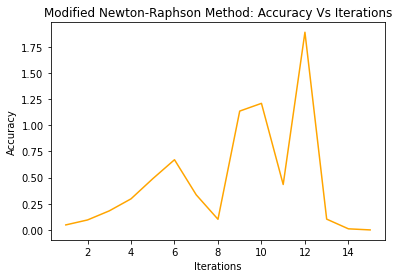

+-----------+----------------------+----------------------+-------------------------+
| Iteration |          x0          |          x1          |          f(x1)          |
+-----------+----------------------+----------------------+-------------------------+
|     1     |         0.5          |  0.4521372667068031  |    13.036356856376152   |
|     2     |  0.4521372667068031  | 0.35679196724518364  |    12.214836647639562   |
|     3     | 0.35679196724518364  |  0.1745670591639559  |    9.445779900082162    |
|     4     |  0.1745670591639559  | -0.12267084474540604 |    3.699285631207607    |
|     5     | -0.12267084474540604 | -0.6122693422895138  |    7.058415229998738    |
|     6     | -0.6122693422895138  | 0.059002588515060794 |    7.189435968038997    |
|     7     | 0.059002588515060794 | -0.27649402969350895 |    1.7913823289103714   |
|     8     | -0.27649402969350895 | -0.1747212631114018  |    2.8864754807615096   |
|     9     | -0.1747212631114018  | -1.31123403647093

In [108]:
mn_acc,Modified_NR_table = modifiedNewtonRaphson(f,f1,f2,x0,e)
mn_i = []
mn_a = []
for i in mn_acc:
    mn_i.append(i[0])
    mn_a.append(i[1])
plt.title("Modified Newton-Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(mn_i,mn_a,color = 'orange')
plt.show()
print(Modified_NR_table)

## Muller's Method



*** MULLER METHOD IMPLEMENTATION ***
Iteration =   3  a = -15.000000000000000 b = -35.000000000000000  c = -6.750000000000000  p = 1.287854737551757  f(p) = -1.376274560795540
Iteration =   4  a = 7.537117200551863 b = -26.929368812952553  c = -1.376274560795540  p = 1.237458750361337  f(p) = 0.126945398693323
Iteration =   5  a = 17.131641762317788 b = -30.691533741783751  c = 0.126945398693323  p = 1.241604514056309  f(p) = 0.002193408761098
Iteration =   6  a = 5.692295815304397 b = -30.067838783307032  c = 0.002193408761098  p = 1.241677463730854  f(p) = -0.000000570403635

Required Root: x = 1.241677463730854


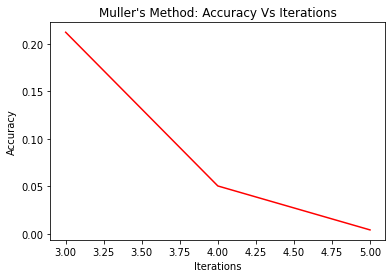

+-----------+--------------------+---------------------+-----------------------+--------------------+------------------------+
| Iteration |         a          |          b          |           c           |      p (root)      |          f(p)          |
+-----------+--------------------+---------------------+-----------------------+--------------------+------------------------+
|     3     |       -15.0        |        -35.0        |         -6.75         | 1.2878547375517568 |  -1.3762745607955402   |
|     4     | 7.5371172005518625 | -26.929368812952553 |  -1.3762745607955402  | 1.2374587503613372 |   0.1269453986933229   |
|     5     | 17.131641762317788 |  -30.69153374178375 |   0.1269453986933229  | 1.2416045140563088 | 0.0021934087610979702  |
|     6     | 5.692295815304397  |  -30.06783878330703 | 0.0021934087610979702 | 1.2416774637308543 | -5.704036354359232e-07 |
+-----------+--------------------+---------------------+-----------------------+--------------------+----------

In [109]:
m_acc,Muller_table = Muller(f,x0,x1,x2,e)
m_i = []
m_a = []
for i in m_acc:
    m_i.append(i[0])
    m_a.append(i[1])
plt.title("Muller's Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(m_i,m_a,color = 'red')
plt.show()
print(Muller_table)

# Tables and Combined Plot

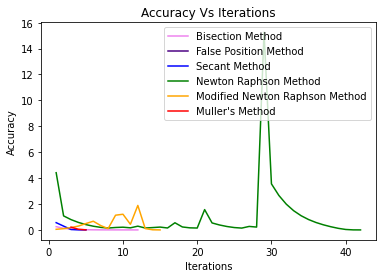

In [110]:

plt.title("Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.plot(b_i,b_a,color = 'violet', label='Bisection Method')                         # Bisection

plt.plot(f_i,f_a,color = 'indigo',label='False Position Method')                     # False Position

plt.plot(s_i,s_a,color = 'blue', label='Secant Method')                              # Secant

plt.plot(n_i,n_a,color = 'green', label='Newton Raphson Method')                     # Newton Raphson

# plt.plot(fx_i,fx_a,color = 'yellow', label='Fixed Point Iteration Mehod')            # Fixed Point Iterations

plt.plot(mn_i,mn_a,color = 'orange',label='Modified Newton Raphson Method')          # Modified Newton Raphson

plt.plot(m_i,m_a,color = 'red',label= "Muller's Method")                             # Muller's Method

plt.legend(loc="upper right")
plt.show()

In [111]:
print("Bisection Method Table")
print(Bisection_table)

Bisection Method Table
+-----------+-----------------+-----+------------------+--------------------+
| Iteration |        a        |  b  |        m         |        f(m)        |
+-----------+-----------------+-----+------------------+--------------------+
|     1     |       0.5       | 1.0 |       0.75       |        12.0        |
|     2     |       0.75      | 1.0 |      0.875       |     9.91015625     |
|     3     |      0.875      | 1.0 |      0.9375      |   8.545166015625   |
|     4     |      0.9375     | 1.0 |     0.96875      | 7.7932281494140625 |
|     5     |     0.96875     | 1.0 |     0.984375     | 7.401520729064941  |
|     6     |     0.984375    | 1.0 |    0.9921875     | 7.201953947544098  |
|     7     |    0.9921875    | 1.0 |    0.99609375    | 7.101271156221628  |
|     8     |    0.99609375   | 1.0 |   0.998046875    | 7.050708592170849  |
|     9     |   0.998046875   | 1.0 |   0.9990234375   | 7.025372482850798  |
|     10    |   0.9990234375  | 1.0 |  0.

In [112]:
print("False Position Method Table")
print(False_position_table)

False Position Method Table
+-----------+----+----+----+-------+
| Iteration | x0 | x1 | x2 | f(x2) |
+-----------+----+----+----+-------+
+-----------+----+----+----+-------+


In [113]:
print("Secant Method Table")
print(Secant_table)

Secant Method Table
+-----------+--------------------+--------------------+--------------------+------------------------+
| Iteration |         x0         |         x1         |         x2         |         f(x2)          |
+-----------+--------------------+--------------------+--------------------+------------------------+
|     1     |        0.5         |        1.0         |        1.56        |   -7.730096639999978   |
|     2     |        1.0         |        1.56        | 1.266121811404491  |  -0.7321860866376468   |
|     3     |        1.56        | 1.266121811404491  | 1.2353735588775248 |   0.1897384668411739   |
|     4     | 1.266121811404491  | 1.2353735588775248 | 1.2417017624929911 | -0.0007313521051948157 |
|     5     | 1.2353735588775248 | 1.2417017624929911 | 1.2416774639187504 | -5.760545889188506e-07 |
+-----------+--------------------+--------------------+--------------------+------------------------+


In [114]:
print("Newton Raphson Method Table")
print(NR_table)

Newton Raphson Method Table
+-----------+----------------------+----------------------+------------------------+
| Iteration |          x0          |          x1          |         f(x1)          |
+-----------+----------------------+----------------------+------------------------+
|     1     |         0.5          |  -3.916666666666667  |   6172.8641975308665   |
|     2     |  -3.916666666666667  |  -2.834713359256831  |   1933.7624532013986   |
|     3     |  -2.834713359256831  | -2.0390739875732606  |    601.731797808343    |
|     4     | -2.0390739875732606  | -1.4615565653538862  |   185.34365294386188   |
|     5     | -1.4615565653538862  | -1.0503832531874018  |   56.34109274736721    |
|     6     | -1.0503832531874018  | -0.7644888454491637  |   16.969632761995236   |
|     7     | -0.7644888454491637  |  -0.568020324700803  |   5.249251436322931    |
|     8     |  -0.568020324700803  | -0.42272093640129926 |   1.9714359012110814   |
|     9     | -0.42272093640129926 | 

In [115]:
print("Fixed Point Iteration Method Table")
print(Fixed_point_iteration_table)

  9761   | -0.011207074229750844 |   0.299237111305606   | 11.488961482003894 |
|    9762   |   0.299237111305606   |  0.39085877256328816  | 12.565981097263805 |
|    9763   |  0.39085877256328816  |  0.46546734694524733  | 13.109786608606504 |
|    9764   |  0.46546734694524733  |   0.5649803378647404  | 13.312135497727297 |
|    9765   |   0.5649803378647404  |   0.8227653968713632  | 10.893441734775523 |
|    9766   |   0.8227653968713632  |  -2.6314637192724626  | 1484.0688683334042 |
|    9767   |  -2.6314637192724626  | -0.011207074229750197 | 5.776543064042974  |
|    9768   | -0.011207074229750197 |  0.29923711130560604  | 11.488961482003894 |
|    9769   |  0.29923711130560604  |   0.3908587725632882  | 12.565981097263807 |
|    9770   |   0.3908587725632882  |   0.4654673469452474  | 13.109786608606505 |
|    9771   |   0.4654673469452474  |   0.5649803378647407  | 13.312135497727295 |
|    9772   |   0.5649803378647407  |   0.8227653968713644  | 10.893441734775507 |
|    97

In [116]:
print("Modified Newton Raphson Method Table")
print(Modified_NR_table)

Modified Newton Raphson Method Table
+-----------+----------------------+----------------------+-------------------------+
| Iteration |          x0          |          x1          |          f(x1)          |
+-----------+----------------------+----------------------+-------------------------+
|     1     |         0.5          |  0.4521372667068031  |    13.036356856376152   |
|     2     |  0.4521372667068031  | 0.35679196724518364  |    12.214836647639562   |
|     3     | 0.35679196724518364  |  0.1745670591639559  |    9.445779900082162    |
|     4     |  0.1745670591639559  | -0.12267084474540604 |    3.699285631207607    |
|     5     | -0.12267084474540604 | -0.6122693422895138  |    7.058415229998738    |
|     6     | -0.6122693422895138  | 0.059002588515060794 |    7.189435968038997    |
|     7     | 0.059002588515060794 | -0.27649402969350895 |    1.7913823289103714   |
|     8     | -0.27649402969350895 | -0.1747212631114018  |    2.8864754807615096   |
|     9     | -0.

In [117]:
print("Muller's Method Table")
print(Muller_table)

Muller's Method Table
+-----------+--------------------+---------------------+-----------------------+--------------------+------------------------+
| Iteration |         a          |          b          |           c           |      p (root)      |          f(p)          |
+-----------+--------------------+---------------------+-----------------------+--------------------+------------------------+
|     3     |       -15.0        |        -35.0        |         -6.75         | 1.2878547375517568 |  -1.3762745607955402   |
|     4     | 7.5371172005518625 | -26.929368812952553 |  -1.3762745607955402  | 1.2374587503613372 |   0.1269453986933229   |
|     5     | 17.131641762317788 |  -30.69153374178375 |   0.1269453986933229  | 1.2416045140563088 | 0.0021934087610979702  |
|     6     | 5.692295815304397  |  -30.06783878330703 | 0.0021934087610979702 | 1.2416774637308543 | -5.704036354359232e-07 |
+-----------+--------------------+---------------------+-----------------------+---------